In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.display import HTML, Video
#from moviepy.editor import VideoFileClip
from PerspectiveTransformation import *
from LaneLines import *

In [2]:
images = []
images.append(mpimg.imread('test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_140.jpg'))

In [3]:
images1 = []
images1.append(mpimg.imread('test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_551.jpg'))

In [4]:
images2 = []
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1100.jpg'))

In [5]:
def plot(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    f = plt.figure(figsize=(24, 9))
    ax1 = f.add_subplot(1, 3, 1)
    ax1.imshow(hls[:,:,0], cmap='gray', vmin=0, vmax=255)
    ax2 = f.add_subplot(1, 3, 2)
    ax2.imshow(hls[:,:,1], cmap='gray', vmin=0, vmax=255)
    ax3 = f.add_subplot(1, 3, 3)
    ax3.imshow(hls[:,:,2], cmap='gray', vmin=0, vmax=255)
    plt.figure()
    plt.imshow(img)

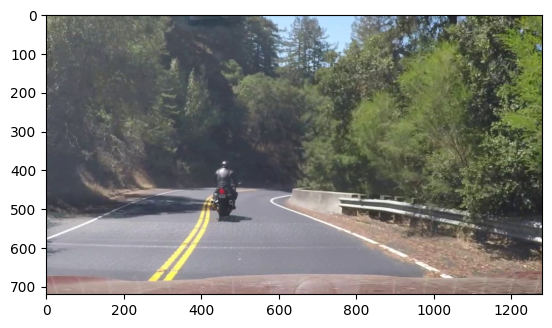

In [6]:
img = images2[2]
birdeye = PerspectiveTransformation()
plt.imshow(img)

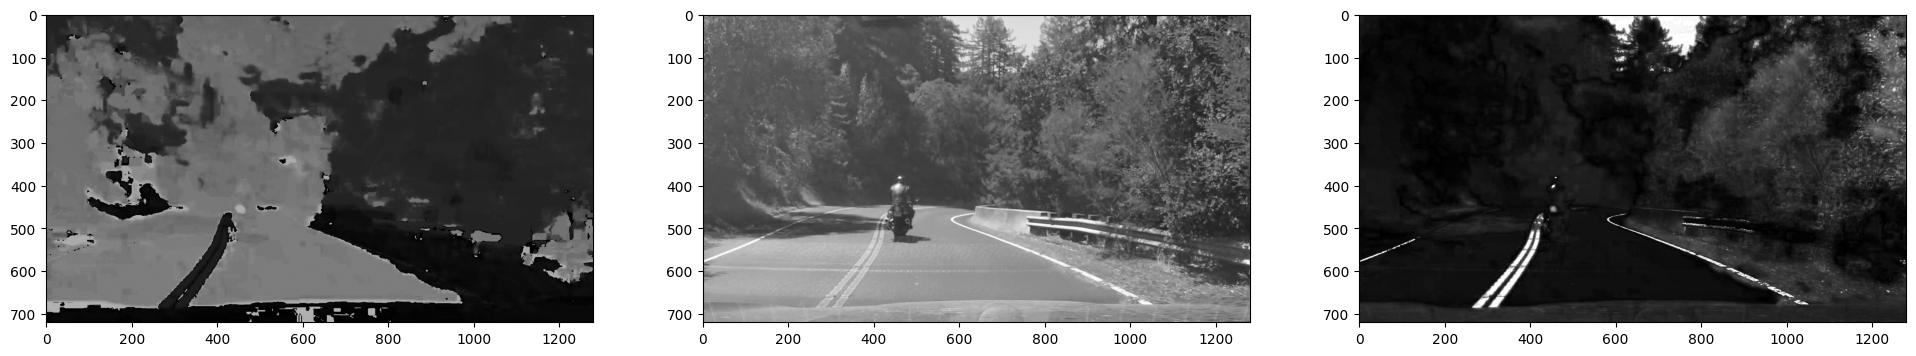

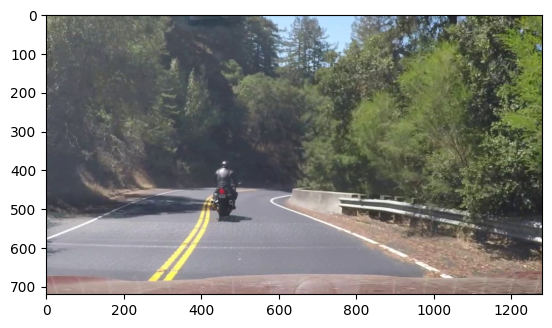

In [7]:
plot(img)

In [8]:
def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)
    
    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

In [9]:
def test(img):
    tmp = birdeye.forward(img)
    tmp = np.copy(img)
    hls = cv2.cvtColor(tmp, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(tmp, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]
    
    f = plt.figure(figsize=(24, 16))
    ax1 = f.add_subplot(2, 2, 1)
    ax1.imshow(tmp)
    ax2 = f.add_subplot(2, 2, 2)
    ax2.imshow(threshold_rel(l_channel, 0.8, 1.0), vmin=0, vmax=255, cmap='gray')
    
    ax3 = f.add_subplot(2, 2, 3)
    ax3.imshow(threshold_rel(s_channel, 0.5, 0.8), vmin=0, vmax=255, cmap='gray')
    
    ax4 = f.add_subplot(2, 2, 4)
    res = threshold_abs(h_channel, 20, 30)
    res &= threshold_rel(v_channel, 0.7, 1.0)
    ax4.imshow(res, vmin=0, vmax=255, cmap='gray')

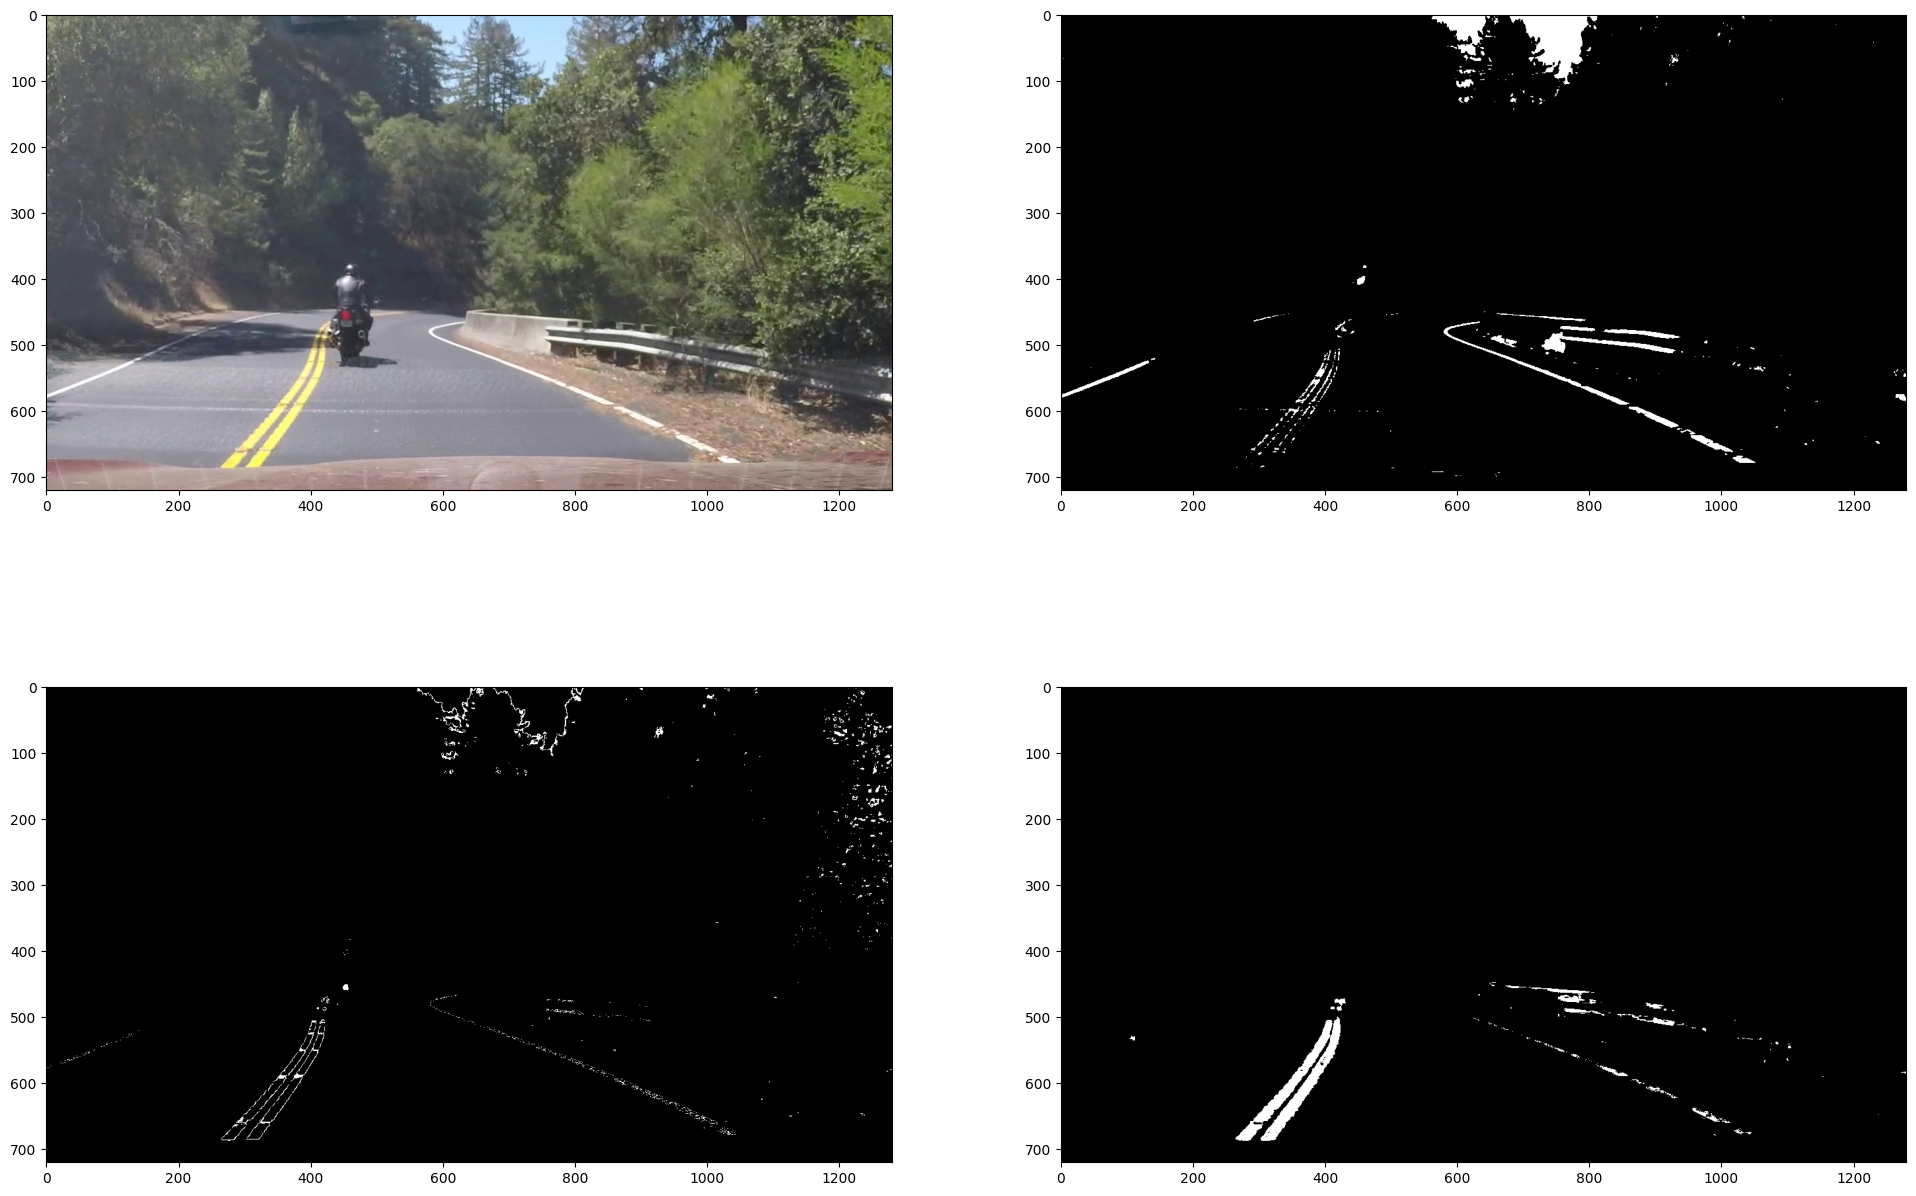

In [10]:
test(images2[2])

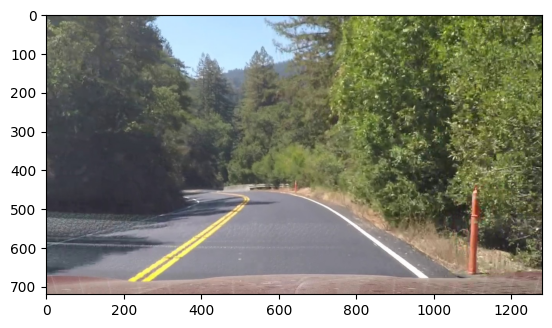

In [11]:
img = images2[1]
plt.imshow(img)

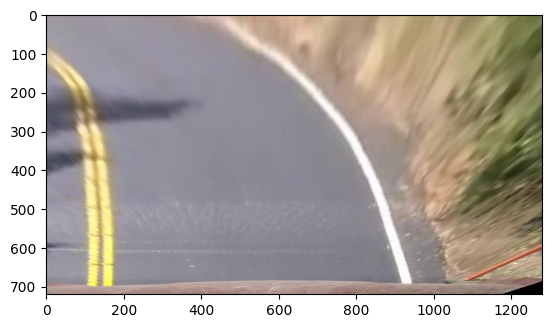

In [12]:
img1 = birdeye.forward(img)
plt.imshow(img1)

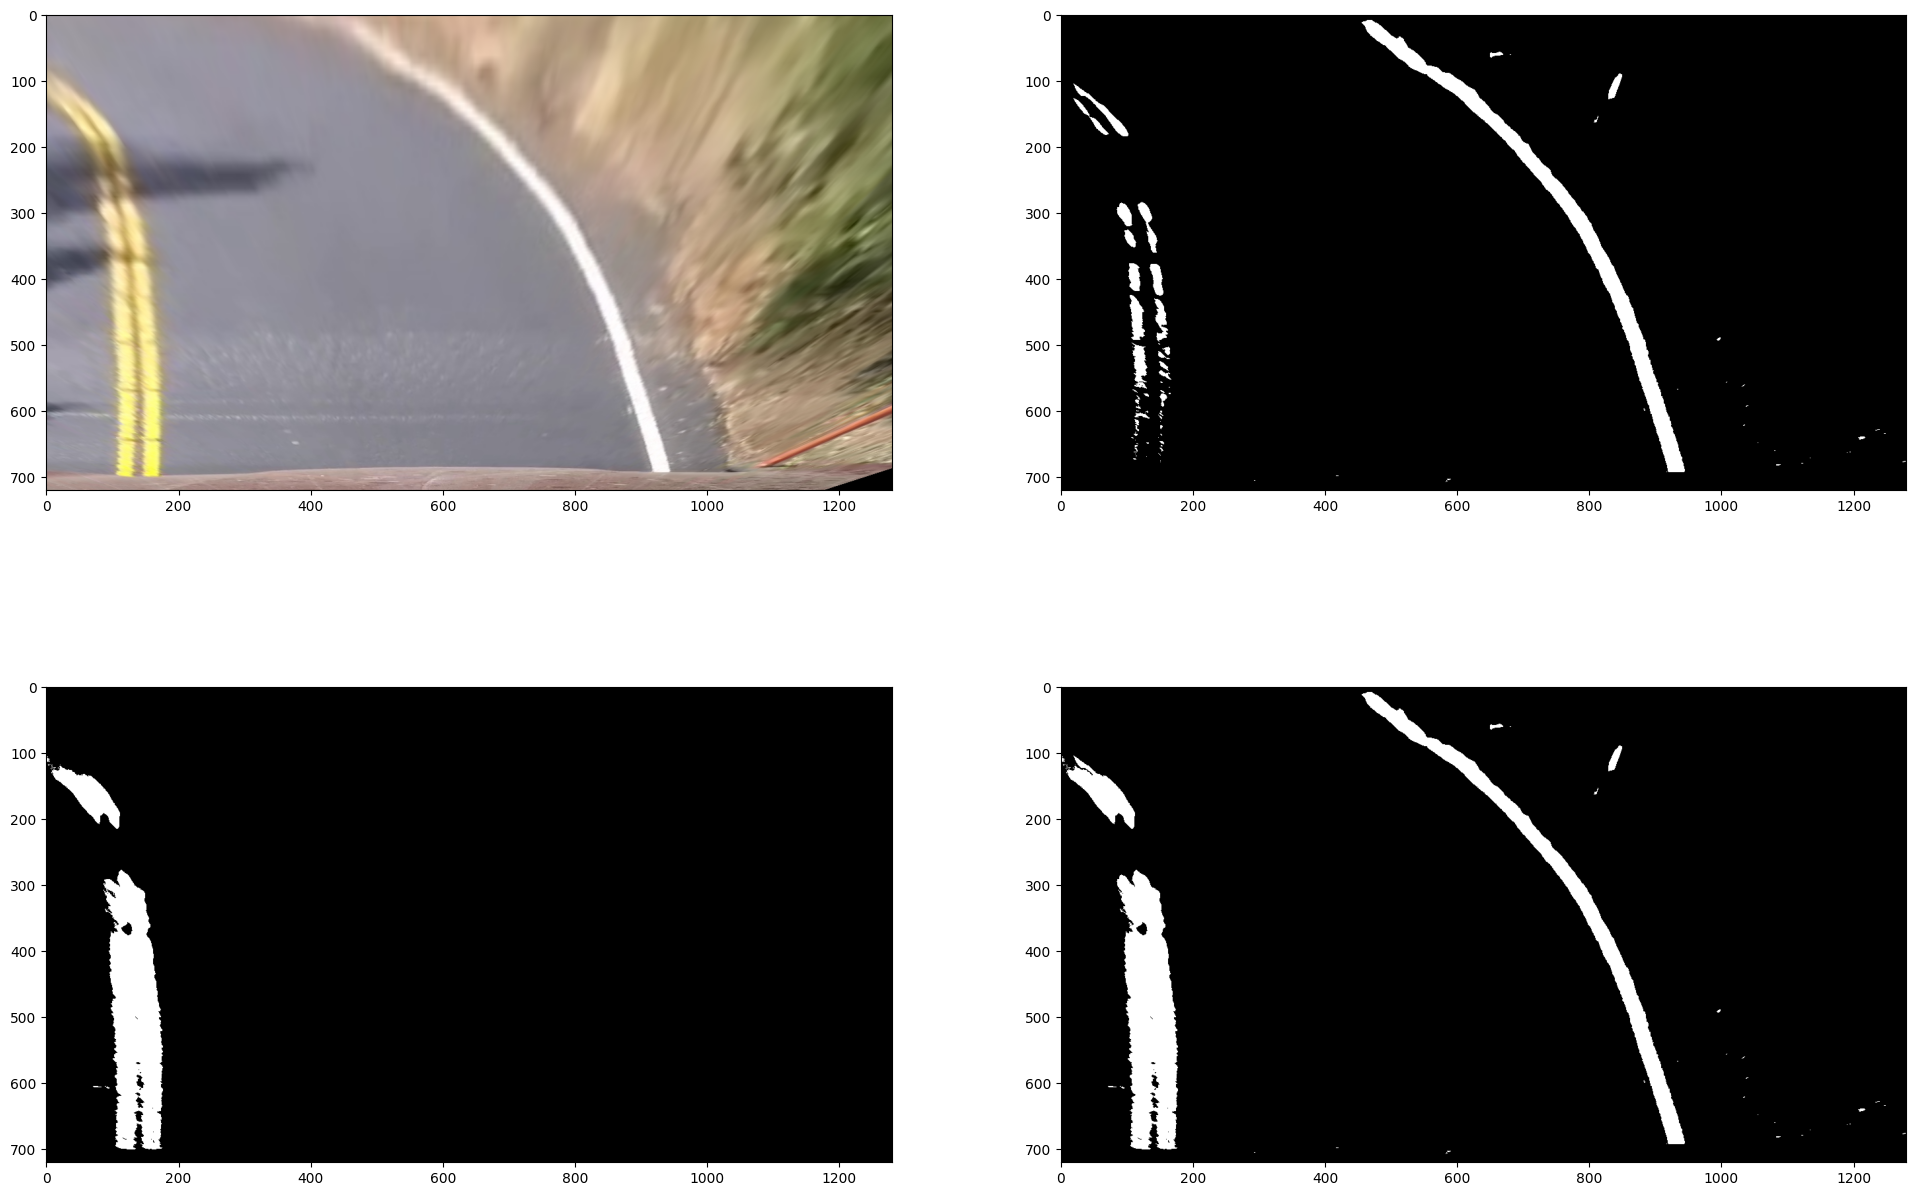

In [13]:
hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(img1)
ax2 = f.add_subplot(2, 2, 2)
right_lane = threshold_rel(l_channel, 0.8, 1.0)
# right_lane[:,:750] = 0
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

ax3 = f.add_subplot(2, 2, 3)
left_lane = threshold_abs(h_channel, 20, 30)
left_lane &= threshold_rel(v_channel, 0.7, 1.0)
left_lane[:,550:] = 0
ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

img2 = left_lane | right_lane
ax4 = f.add_subplot(2, 2, 4)
ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')

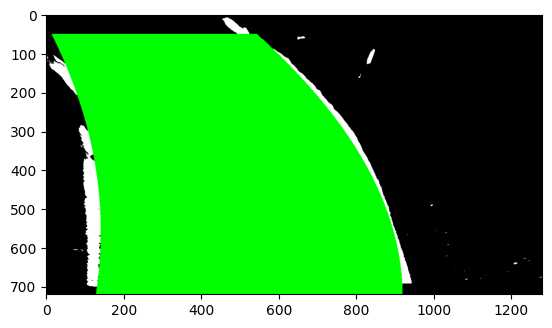

In [14]:
lanelines = LaneLines()
img3 = lanelines.forward(img2)
plt.imshow(img3)

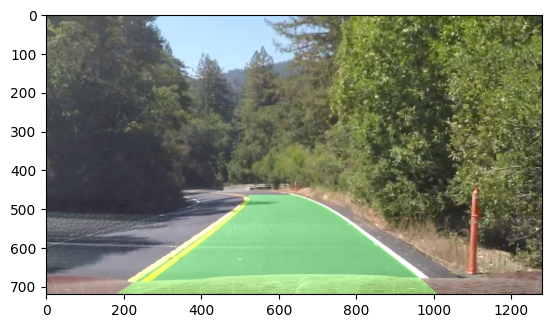

In [15]:
img4 = birdeye.backward(img3)
out_img = cv2.addWeighted(img, 1, img4, 0.3, 0)
plt.imshow(out_img)

In [16]:
birdeye = PerspectiveTransformation()
lanelines = LaneLines()
def process_image(img):
    # step 1
    img1 = birdeye.forward(img)
#     img1 = np.copy(img)
    
    # step 2
    hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    right_lane = threshold_rel(l_channel, 0.8, 1.0)
    right_lane[:,:750] = 0

    left_lane = threshold_abs(h_channel, 20, 30)
    left_lane &= threshold_rel(v_channel, 0.7, 1.0)
    left_lane[:,550:] = 0

    img2 = left_lane | right_lane
    
#     img2 = birdeye.forward(img2)
    
    # step 3
    img3 = lanelines.forward(img2)
    
    # step 4
    img4 = birdeye.backward(img3)
    out_img = cv2.addWeighted(img, 1, img4, 1, 0)
    
    return out_img

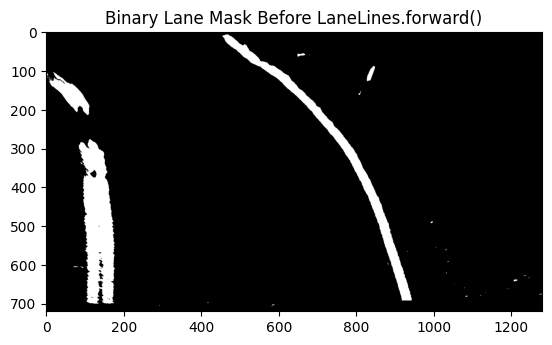

In [17]:
plt.imshow(img2, cmap='gray')
plt.title("Binary Lane Mask Before LaneLines.forward()")
plt.show()


A:\PROJECT\Lane and curve detection\LaneLines.py:277: RuntimeWarning: divide by zero encountered in scalar divide
  left_curveR =  ((1 + (2*left_fit[0] *y_eval + left_fit[1])**2)**1.5)  / np.absolute(2*left_fit[0])


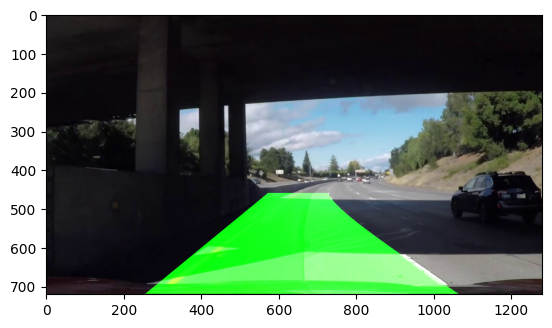

In [18]:
tmp = process_image(images[4])
plt.imshow(tmp)

In [19]:
#clip = VideoFileClip("challenge_video.mp4")

In [20]:
#Video("challenge_video.mp4")

In [21]:
#out_clip = clip.fl_image(process_image)
#out_clip.write_videofile("output_videos/tmp.mp4", audio=False)

In [23]:
#Video("output_videos/tmp.mp4")

In [24]:
import cv2
import numpy as np
from PerspectiveTransformation import *
from LaneLines import *

# Initialize
birdeye = PerspectiveTransformation()
lanes = LaneLines()

# Load direction icons
right_icon = cv2.imread(r"A:\PROJECT\Lane and curve detection\right_turn.png", cv2.IMREAD_UNCHANGED)
left_icon = cv2.imread(r"A:\PROJECT\Lane and curve detection\left_turn.png", cv2.IMREAD_UNCHANGED)
straight_icon = cv2.imread(r"A:\PROJECT\Lane and curve detection\straight.png", cv2.IMREAD_UNCHANGED)

# Resize icons
icon_size = (100, 100)
right_icon = cv2.resize(right_icon, icon_size)
left_icon = cv2.resize(left_icon, icon_size)
straight_icon = cv2.resize(straight_icon, icon_size)

# Video I/O
cap = cv2.VideoCapture(r"A:\PROJECT\Lane and curve detection\harder_challenge_video.mp4")
#cap = cv2.VideoCapture(r"A:\PROJECT\Lane and curve detection\test1.mp4")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter("output_final_with_icons.avi", fourcc, 20.0, (1280, 720))

def overlay_icon(background, icon, x, y):
    """Blend RGBA icon onto BGR background at position (x, y)."""
    if icon.shape[2] == 4:  # has alpha
        alpha = icon[:, :, 3] / 255.0
        for c in range(3):
            background[y:y+icon.shape[0], x:x+icon.shape[1], c] = (
                alpha * icon[:, :, c] +
                (1 - alpha) * background[y:y+icon.shape[0], x:x+icon.shape[1], c]
            )
    else:
        background[y:y+icon.shape[0], x:x+icon.shape[1]] = icon
    return background


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # ===== Step 1: Perspective transform =====
    warped = birdeye.forward(frame)

    # ===== Step 2: Grayscale + Threshold =====
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # ===== Step 3: Detect lanes =====
    lane_mask = lanes.forward(binary)

    # ===== Step 4: Green overlay =====
    lane_area = np.zeros_like(frame)
    lane_area[:, :, 1] = cv2.warpPerspective(lane_mask[:, :, 1], birdeye.M_inv, (1280, 720))
    overlay = cv2.addWeighted(frame, 1, lane_area, 0.4, 0)

    # ===== Step 5: Lane metrics =====
    left_curv, right_curv, pos = lanes.measure_curvature()
    curvature = int(min(left_curv, right_curv))

    # Direction logic
    if lanes.left_fit is not None and lanes.right_fit is not None:
        curve_val = (lanes.left_fit[0] + lanes.right_fit[0]) / 2
    else:
        curve_val = 0

    if abs(curve_val) <= 0.00015:
        direction = "Straight Ahead"
        icon = straight_icon
    elif curve_val < 0:
        direction = "Left Curve Ahead"
        icon = left_icon
    else:
        direction = "Right Curve Ahead"
        icon = right_icon

    # ===== Step 6: Left Info Panel =====
    panel = overlay.copy()
    cv2.rectangle(panel, (0, 0), (400, 250), (30, 30, 30), -1)
    overlay = cv2.addWeighted(panel, 0.5, overlay, 0.7, 0)

    # Overlay direction sign
    overlay = overlay_icon(overlay, icon, 30, 20)

    # Text information
    cv2.putText(overlay, direction, (150, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
    cv2.putText(overlay, f"Curvature = {curvature} m", (30, 130), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv2.putText(overlay, "Good Lane Keeping", (30, 170), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.putText(overlay, f"Vehicle is {abs(pos):.2f} m from center", (30, 210), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # ===== Step 7: Display and Save =====
    cv2.imshow("Lane Detection", overlay)
    out.write(overlay)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
